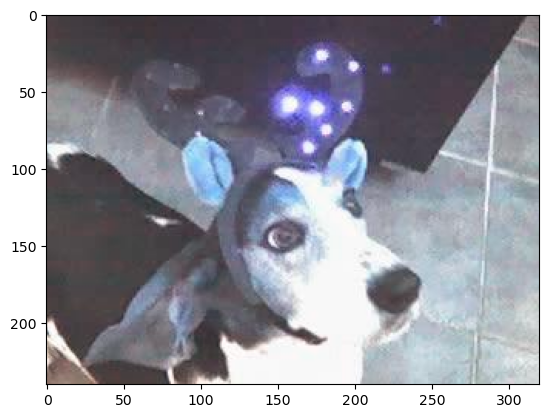

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "G:\JupyterData\Dog_Images"
CATEGORIES = ['Basset','Borzoi','Golden_retriever','Irish_wolfhound','Labrador_retriever']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

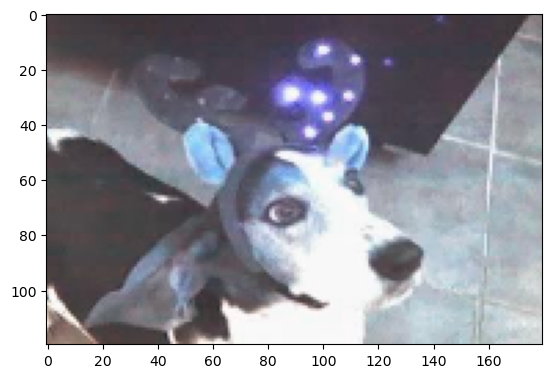

In [135]:
#IMG_WTD = 120
#IMG_HGT = 80
IMG_WTD = 180
IMG_HGT = 120

new_array = cv2.resize(img_array, (IMG_WTD, IMG_HGT))
plt.imshow(new_array, cmap="gray")
plt.show()

In [136]:
print(new_array)

[[[ 74  65  68]
  [ 74  65  68]
  [ 74  65  68]
  ...
  [133 128 130]
  [121 116 118]
  [110 105 107]]

 [[ 76  65  68]
  [ 76  65  68]
  [ 74  65  68]
  ...
  [134 127 130]
  [135 128 131]
  [130 123 126]]

 [[ 75  64  67]
  [ 75  64  67]
  [ 75  64  67]
  ...
  [131 122 125]
  [134 125 128]
  [134 125 128]]

 ...

 [[131 108 100]
  [140 117 109]
  [127 104  96]
  ...
  [215 219 220]
  [214 218 219]
  [211 215 216]]

 [[139 114 104]
  [141 116 106]
  [137 112 102]
  ...
  [207 211 212]
  [209 213 214]
  [212 216 217]]

 [[139 112 102]
  [143 118 108]
  [151 126 116]
  ...
  [209 213 214]
  [210 214 215]
  [211 215 216]]]


In [155]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_WTD, IMG_HGT))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass #Normally trow the excepion to firure out what's going wrong
            
create_training_data()

In [156]:
print(new_array)

[[[ 74  65  68]
  [ 74  65  68]
  [ 74  65  68]
  ...
  [133 128 130]
  [121 116 118]
  [110 105 107]]

 [[ 76  65  68]
  [ 76  65  68]
  [ 74  65  68]
  ...
  [134 127 130]
  [135 128 131]
  [130 123 126]]

 [[ 75  64  67]
  [ 75  64  67]
  [ 75  64  67]
  ...
  [131 122 125]
  [134 125 128]
  [134 125 128]]

 ...

 [[131 108 100]
  [140 117 109]
  [127 104  96]
  ...
  [215 219 220]
  [214 218 219]
  [211 215 216]]

 [[139 114 104]
  [141 116 106]
  [137 112 102]
  ...
  [207 211 212]
  [209 213 214]
  [212 216 217]]

 [[139 112 102]
  [143 118 108]
  [151 126 116]
  ...
  [209 213 214]
  [210 214 215]
  [211 215 216]]]


In [157]:
print(len(training_data))

865


In [158]:
import random

random.shuffle(training_data)

In [159]:
for sample in training_data[:10]:
    print(sample[1])

1
1
3
2
2
3
2
2
2
2


In [160]:
X_train = []
y_train = []

In [161]:
for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, IMG_WTD, IMG_HGT, 3)
y_train = np.array(y_train)

In [162]:
print(X_train[1])

[[[156 205 203]
  [156 199 198]
  [166 204 204]
  ...
  [ 50  93 145]
  [ 63  78 124]
  [ 43  89  94]]

 [[ 99 214 176]
  [ 96 209 171]
  [ 89 213 168]
  ...
  [ 24  33  60]
  [196 209 223]
  [165 180 189]]

 [[200 211 218]
  [208 218 221]
  [146 154 154]
  ...
  [ 44  89  83]
  [ 32  49  46]
  [113 121 120]]

 ...

 [[103 225 190]
  [ 60 200 167]
  [ 88 230 204]
  ...
  [ 61 106  89]
  [ 83 135 115]
  [ 70 133 111]]

 [[ 39 110  86]
  [ 34 115  88]
  [ 45 115  95]
  ...
  [ 19  27  73]
  [ 34  37  68]
  [220 225 234]]

 [[208 223 225]
  [ 58  84  98]
  [ 50  75  91]
  ...
  [ 72  99 119]
  [ 71 105 121]
  [105 142 156]]]


In [55]:
#import pickle

#pickle_out = open("X.pickle","wb")
#pickle.dump(X_train, pickle_out)
#pickle_out.close()

#pickle_out = open("y.pickle","wb")
#pickle.dump(y_train, pickle_out)
#pickle_out.close()

In [56]:
#Teraz pora na dostarczenie daych do sieci

In [ ]:
#pickle_in = open("X.pickle","rb")
#X_train = pickle.load(pickle_in)

#pickle_in = open("y.pickle","rb")
#y_train = pickle.load(pickle_in)

#X = X/255.0
#X = np.asarray(X, dtype = 'int')
#X_train = tf.keras.utils.normalize(X_train, axis=1)
#X_train = [eval(i) for i in X_train]

#for i in range(0, len(X_train)-1):
#    X_train[i] = int(X_train[i])

In [163]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(IMG_WTD, IMG_HGT, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(5))
model.add(Activation('sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [164]:
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
28/28 [==============================] - 25s 844ms/step - loss: 572.6427 - accuracy: 0.2451
Epoch 2/10
28/28 [==============================] - 26s 934ms/step - loss: 1.5222 - accuracy: 0.3723
Epoch 3/10
28/28 [==============================] - 26s 915ms/step - loss: 1.3529 - accuracy: 0.4543
Epoch 4/10
28/28 [==============================] - 27s 968ms/step - loss: 1.1902 - accuracy: 0.5295
Epoch 5/10
28/28 [==============================] - 27s 968ms/step - loss: 1.0528 - accuracy: 0.5954
Epoch 6/10
28/28 [==============================] - 29s 1s/step - loss: 0.8592 - accuracy: 0.6763
Epoch 7/10
28/28 [==============================] - 27s 965ms/step - loss: 0.8260 - accuracy: 0.6809
Epoch 8/10
28/28 [==============================] - 26s 946ms/step - loss: 0.7843 - accuracy: 0.7006
Epoch 9/10
28/28 [==============================] - 25s 889ms/step - loss: 0.6109 - accuracy: 0.7618
Epoch 10/10
28/28 [==============================] - 24s 870ms/step - loss: 0.5032 - accurac

In [165]:
#Architektura AlexNet jako model_1

import keras.layers as layers

model_1 = Sequential()
# Obraz RGB w rozmiarze IMG_WTD x IMG_HGT
model_1.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(IMG_WTD, IMG_HGT, 3)))


model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model_1.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model_1.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(4096, activation="relu"))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(5, activation="softmax"))

model_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 43, 28, 96)        34944     
                                                                 
 batch_normalization_45 (Bat  (None, 43, 28, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 21, 13, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 21, 13, 256)       614656    
                                                                 
 batch_normalization_46 (Bat  (None, 21, 13, 256)      1024      
 chNormalization)                                                
                                                     

In [166]:
#model_1.fit(X_train, y_train, epochs=10)

In [167]:
model_1.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
28/28 [==============================] - 22s 755ms/step - loss: 8.3768 - accuracy: 0.2486
Epoch 2/10
28/28 [==============================] - 25s 900ms/step - loss: 5.4733 - accuracy: 0.2717
Epoch 3/10
28/28 [==============================] - 29s 1s/step - loss: 4.3076 - accuracy: 0.2925
Epoch 4/10
28/28 [==============================] - 28s 974ms/step - loss: 3.4407 - accuracy: 0.2902
Epoch 5/10
28/28 [==============================] - 24s 873ms/step - loss: 2.4891 - accuracy: 0.3040
Epoch 6/10
28/28 [==============================] - 23s 833ms/step - loss: 2.0507 - accuracy: 0.3156
Epoch 7/10
28/28 [==============================] - 23s 801ms/step - loss: 1.9584 - accuracy: 0.3110
Epoch 8/10
28/28 [==============================] - 22s 787ms/step - loss: 1.8373 - accuracy: 0.3364
Epoch 9/10
28/28 [==============================] - 22s 791ms/step - loss: 1.6329 - accuracy: 0.3688
Epoch 10/10
28/28 [==============================] - 22s 801ms/step - loss: 1.5460 - accuracy:

In [178]:
#Architektura LeNet-5 jako model_1

model_2 = Sequential()
# Obraz RGB w rozmiarze IMG_WTD x IMG_HGT
model_2.add(layers.Conv2D(filters=6, kernel_size=(3, 3), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(IMG_WTD, IMG_HGT, 3)))

#model_2.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(IMG_WTD, IMG_HGT, 3)))

model_2.add(layers.AveragePooling2D())
model_2.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_2.add(layers.AveragePooling2D())
model_2.add(layers.Flatten())
model_2.add(layers.Dense(units=120, activation='relu'))
model_2.add(layers.Dense(units=84, activation='relu'))
model_2.add(layers.Dense(units=10, activation = 'softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_2.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 45, 30, 6)         168       
                                                                 
 average_pooling2d_10 (Avera  (None, 22, 15, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_87 (Conv2D)          (None, 20, 13, 16)        880       
                                                                 
 average_pooling2d_11 (Avera  (None, 10, 6, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten_27 (Flatten)        (None, 960)               0         
                                                                 
 dense_59 (Dense)            (None, 120)             

In [179]:
model_2.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\DELL\.conda\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\DELL\.conda\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DELL\.conda\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\DELL\.conda\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\DELL\.conda\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\DELL\.conda\envs\tensorflow\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\DELL\.conda\envs\tensorflow\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\DELL\.conda\envs\tensorflow\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\DELL\.conda\envs\tensorflow\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\DELL\.conda\envs\tensorflow\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible
